In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

import keras
import os
import tensorflow as tf

local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 17, 17, 768)


In [2]:
train_path = os.path.join(".", "rice_leaf", "train")
validation_path = os.path.join(".", "rice_leaf", "val")
test_path = os.path.join(".", "rice_leaf", "test")

In [3]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,log = {}):
    if(log.get('val_accuracy')>0.95):
        print("\n Reached 95% Accuracy for validation.")
        self.model.stop_training = True

callbacks = MyCallback()

In [4]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x = layers.Conv2D(64, (3,3), activation='relu')(last_output)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(3, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = "categorical_crossentropy", 
              metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

In [7]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.2,
                                     rotation_range=360,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=64,
                                                     target_size=(300,300),
                                                     class_mode='categorical')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(validation_path,
                                               batch_size=32,
                                               target_size=(300,300),
                                               class_mode='categorical')

Found 650 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


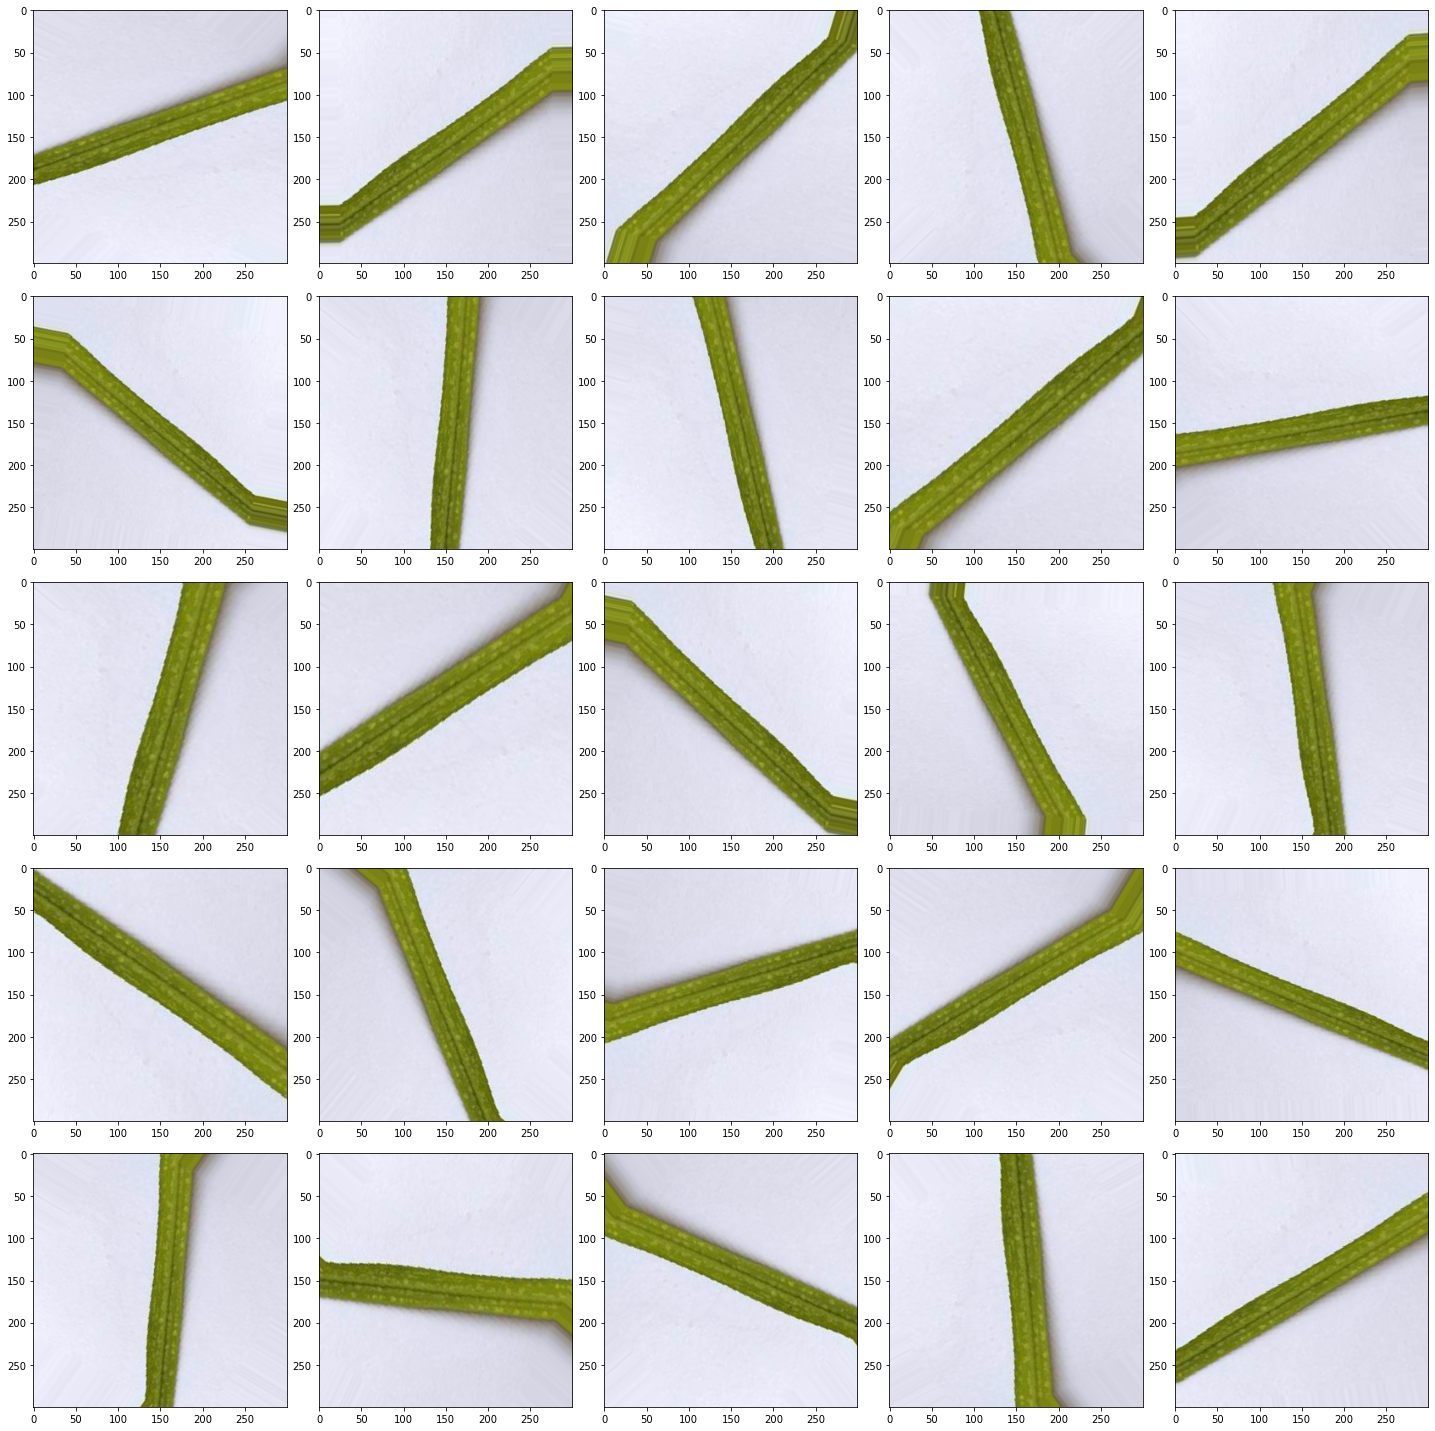

In [8]:
import matplotlib.pyplot as plt
def plotImages(image_arr):
    fig,axes = plt.subplots(5, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
img_array = [train_data_gen[0][0][0] for i in range(25)]
plotImages(img_array)

In [9]:
history = model.fit(train_data_gen, 
                    epochs=300, 
                    validation_data = val_data_gen, 
                    verbose = 1,
                    callbacks = [callbacks]
                   )

Epoch 1/300
11/11 [==============================] - 28s 3s/step - loss: 1.0772 - accuracy: 0.4092 - val_loss: 1.0528 - val_accuracy: 0.3952
Epoch 2/300
11/11 [==============================] - 27s 2s/step - loss: 1.0273 - accuracy: 0.4015 - val_loss: 1.0272 - val_accuracy: 0.4153
Epoch 3/300
11/11 [==============================] - 27s 2s/step - loss: 1.0129 - accuracy: 0.4354 - val_loss: 1.0061 - val_accuracy: 0.4274
Epoch 4/300
11/11 [==============================] - 27s 2s/step - loss: 0.9684 - accuracy: 0.4754 - val_loss: 0.9503 - val_accuracy: 0.4677
Epoch 5/300
11/11 [==============================] - 27s 2s/step - loss: 0.9188 - accuracy: 0.5092 - val_loss: 0.8811 - val_accuracy: 0.5323
Epoch 6/300
11/11 [==============================] - 27s 2s/step - loss: 0.8448 - accuracy: 0.5677 - val_loss: 0.9030 - val_accuracy: 0.5565
Epoch 7/300
11/11 [==============================] - 27s 2s/step - loss: 0.8839 - accuracy: 0.5538 - val_loss: 0.9015 - val_accuracy: 0.4919
Epoch 8/300
1

Epoch 59/300
11/11 [==============================] - 29s 3s/step - loss: 0.4903 - accuracy: 0.8046 - val_loss: 0.7790 - val_accuracy: 0.6492
Epoch 60/300
11/11 [==============================] - 27s 2s/step - loss: 0.5361 - accuracy: 0.7692 - val_loss: 0.6748 - val_accuracy: 0.7016
Epoch 61/300
11/11 [==============================] - 27s 2s/step - loss: 0.4540 - accuracy: 0.7969 - val_loss: 0.6790 - val_accuracy: 0.7218
Epoch 62/300
11/11 [==============================] - 27s 2s/step - loss: 0.4900 - accuracy: 0.7831 - val_loss: 0.6072 - val_accuracy: 0.7419
Epoch 63/300
11/11 [==============================] - 27s 2s/step - loss: 0.5216 - accuracy: 0.7677 - val_loss: 0.6652 - val_accuracy: 0.7298
Epoch 64/300
11/11 [==============================] - 28s 3s/step - loss: 0.4697 - accuracy: 0.8108 - val_loss: 0.6406 - val_accuracy: 0.7177
Epoch 65/300
11/11 [==============================] - 28s 2s/step - loss: 0.4778 - accuracy: 0.7785 - val_loss: 0.6184 - val_accuracy: 0.7177
Epoch 

11/11 [==============================] - 29s 3s/step - loss: 0.3278 - accuracy: 0.8615 - val_loss: 0.7512 - val_accuracy: 0.7540
Epoch 174/300
11/11 [==============================] - 28s 3s/step - loss: 0.4046 - accuracy: 0.8215 - val_loss: 0.7190 - val_accuracy: 0.7137
Epoch 175/300
11/11 [==============================] - 28s 3s/step - loss: 0.3635 - accuracy: 0.8569 - val_loss: 0.8871 - val_accuracy: 0.6855
Epoch 176/300
11/11 [==============================] - 28s 2s/step - loss: 0.4069 - accuracy: 0.8123 - val_loss: 0.8952 - val_accuracy: 0.6855
Epoch 177/300
11/11 [==============================] - 27s 2s/step - loss: 0.3928 - accuracy: 0.8477 - val_loss: 0.7620 - val_accuracy: 0.7137
Epoch 178/300
11/11 [==============================] - 27s 2s/step - loss: 0.3798 - accuracy: 0.8446 - val_loss: 0.7358 - val_accuracy: 0.7016
Epoch 179/300
11/11 [==============================] - 28s 3s/step - loss: 0.3484 - accuracy: 0.8585 - val_loss: 0.7366 - val_accuracy: 0.7379
Epoch 180/300

11/11 [==============================] - 28s 2s/step - loss: 0.3648 - accuracy: 0.8400 - val_loss: 1.1739 - val_accuracy: 0.6371
Epoch 288/300
11/11 [==============================] - 28s 2s/step - loss: 0.3416 - accuracy: 0.8569 - val_loss: 0.8468 - val_accuracy: 0.6935
Epoch 289/300
11/11 [==============================] - 27s 2s/step - loss: 0.3597 - accuracy: 0.8415 - val_loss: 0.6847 - val_accuracy: 0.7339
Epoch 290/300
11/11 [==============================] - 27s 2s/step - loss: 0.3257 - accuracy: 0.8585 - val_loss: 0.7402 - val_accuracy: 0.7500
Epoch 291/300
11/11 [==============================] - 28s 2s/step - loss: 0.3064 - accuracy: 0.8662 - val_loss: 0.8089 - val_accuracy: 0.7379
Epoch 292/300
11/11 [==============================] - 28s 3s/step - loss: 0.3198 - accuracy: 0.8662 - val_loss: 0.7015 - val_accuracy: 0.7298
Epoch 293/300
11/11 [==============================] - 29s 3s/step - loss: 0.2580 - accuracy: 0.8969 - val_loss: 0.8014 - val_accuracy: 0.7500
Epoch 294/300

In [10]:
import numpy as np
acc = np.array([])
val_acc = np.array([])

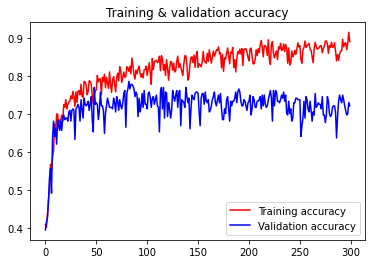

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

# Plot the results
acc = np.concatenate((acc,history.history['accuracy']), axis=0)
val_acc = np.concatenate((val_acc,history.history['val_accuracy']), axis=0)

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def consecutive_means(input_tensor):
  num_outputs = len(input_tensor) - 1
  x = np.zeros(num_outputs)
  for i in range(num_outputs):
      x[i] = 1/2 * (input_tensor[i] + input_tensor[i+1]) 
  return x

def between(x):
    if x == 0:
        return "2-3"
    elif x == 1:
        return "3-4"
    elif x == 2:
        return "4-5"
    
dirs = []
for i in os.listdir(test_path):
    path = os.path.join(".","rice_leaf", "test", i)
    files = os.listdir(path)
    for file in files:
        dirs.append(os.path.join(".","rice_leaf", "test", i, file))
n = len(dirs)
np.random.shuffle(dirs)
counter = 0
plt.subplots(figsize=(20,n*3))
for i,fn in enumerate(dirs):
    # predicting images
    path = os.path.join(fn)
    real_class = path.split("\\")[-2]
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    if between(np.argmax(classes)) == real_class:
        counter += 1
    plt.subplot(n//4 + 1,4,i+1)
    plt.imshow(img)
    plt.title("Predict : " + str(between(np.argmax(classes))) + "\nReal : " + real_class)
    
print("Accuracy : " + str(counter/n))

In [19]:
import pathlib
import tensorflow as tf
export_dir = './saved_model/model_TL'
tf.saved_model.save(model, export_dir)

mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT
    
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [optimization]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./color_classification_TL.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: ./saved_model/2\assets


INFO:tensorflow:Assets written to: ./saved_model/2\assets


9987656